In [446]:
from matplotlib import pyplot as plt
from sklearn.model_selection import  train_test_split, GridSearchCV
import matplotlib.style as style
import numpy  as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
pd.set_option('display.max_columns', 100)

In [447]:
df = pd.read_csv('train.csv')

In [448]:
test = pd.read_csv('test.csv')

In [449]:
stored_cols = df.columns

### Функции перевода названия признаков в верхний регистр и обратно

In [450]:
def lowercase_cols(df):
    
    df.columns = map(str.lower, df.columns)
    
    return df

In [451]:
def upperrcase_cols(df):
    
    df = df.rename(index=str, columns={'id':'Id', 'price':'Price'})
    
    return df

In [452]:
df = lowercase_cols(df)

In [453]:
test = lowercase_cols(test)

In [454]:
df.head(3)

,id,districtid,rooms,square,lifesquare,kitchensquare,floor,housefloor,houseyear,ecology_1,ecology_2,ecology_3,social_1,social_2,social_3,healthcare_1,helthcare_2,shops_1,shops_2,price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524


### Разделение датафрейма на тренировочный и валидационный

In [455]:
train, valid = train_test_split(df, test_size=0.3, random_state=42)

In [456]:
train.shape, valid.shape, test.shape

((7000, 20), (3000, 20), (5000, 19))

### Проверка и корректировка выбросов вручную

#### rooms

In [457]:
train.head(2)

,id,districtid,rooms,square,lifesquare,kitchensquare,floor,housefloor,houseyear,ecology_1,ecology_2,ecology_3,social_1,social_2,social_3,healthcare_1,helthcare_2,shops_1,shops_2,price
9069,14604,23,1.0,41.681380,22.796166,8.0,14,17.0,2015,0.075779,B,B,6,1437,3,NaN,0,2,B,88504.384965
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,207007.956663


In [458]:
train['rooms'].value_counts()

2.0     2725
1.0     2594
3.0     1558
4.0      103
5.0       12
0.0        5
19.0       1
10.0       1
6.0        1
Name: rooms, dtype: int64

In [459]:
train.groupby('rooms')[['square']].median().T

rooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,10.0,19.0
square,49.483501,40.352571,55.950652,77.44389,98.686703,111.185575,59.414334,59.056975,42.006046


In [460]:
train.loc[train['rooms'] == 19, 'rooms'] = 1
train.loc[train['rooms'] == 10, 'rooms'] = 2
train.loc[train['rooms'] == 6, 'rooms'] = 2
train.loc[train['id'] == 456, 'rooms'] = 3
train.loc[train['id'] == 12638, 'rooms'] = 5
train.loc[train['id'] == 7317, 'rooms'] = 1
train.loc[train['id'] == 770, 'rooms'] = 2

In [461]:
valid.loc[valid['rooms'] == 10, 'rooms'] = 2
valid.loc[valid['id'] == 3159, 'rooms'] = 1
valid.loc[valid['id'] == 9443, 'rooms'] = 3

In [462]:
test.loc[test['rooms'] == 17, 'rooms'] = 2
test.loc[test['id'] == 3343, 'rooms'] = 5
test.loc[test['id'] == 10729, 'rooms'] = 3
test.loc[test['id'] == 6060, 'rooms'] = 4

#### square

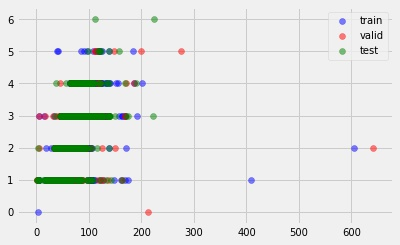

In [463]:
plt.scatter(train['square'], train['rooms'], c='b', alpha=0.5, label='train')
plt.scatter(valid['square'], valid['rooms'], c='r', alpha=0.5, label='valid')
plt.scatter(test['square'], test['rooms'], c='g', alpha=0.5, label='test')


plt.legend()

In [464]:
train.loc[train['id'] == 28, 'square'] = 55.95
train.loc[train['id'] == 2307, 'square'] = 40.35

In [465]:
valid.loc[valid['square'] >500, 'square'] = 64

#### lifesquare

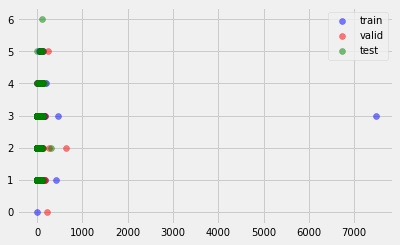

In [466]:
plt.scatter(train['lifesquare'], train['rooms'], c='b', alpha=0.5, label='train')
plt.scatter(valid['lifesquare'], valid['rooms'], c='r', alpha=0.5, label='valid')
plt.scatter(test['lifesquare'], test['rooms'], c='g', alpha=0.5, label='test')


plt.legend()

In [467]:
train.groupby('rooms')[['lifesquare']].median().T

rooms,0.0,1.0,2.0,3.0,4.0,5.0
lifesquare,0.873147,21.712081,32.581594,47.070342,65.087349,76.057079


In [468]:
train.loc[train['lifesquare'] > 6000, 'lifesquare'] = 47.1
train.loc[train['id'] == 15886, 'lifesquare'] = 47.1
train.loc[train['id'] == 2307, 'lifesquare'] = 21.7

In [469]:
valid.loc[valid['id'] == 11602, 'lifesquare'] = 32.58
valid.loc[valid['id'] == 14990, 'lifesquare'] = 32.58

In [470]:
test.loc[test['id'] == 11533, 'lifesquare'] = 30.3

#### kitchensquare

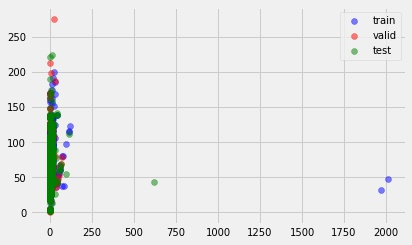

In [471]:
plt.scatter(train['kitchensquare'], train['square'], c='b', alpha=0.5, label='train')
plt.scatter(valid['kitchensquare'], valid['square'], c='r', alpha=0.5, label='valid')
plt.scatter(test['kitchensquare'], test['square'], c='g', alpha=0.5, label='test')


plt.legend()

In [472]:
train.groupby('rooms')[['kitchensquare']].median().T

rooms,0.0,1.0,2.0,3.0,4.0,5.0
kitchensquare,0.0,6.0,6.0,7.0,8.0,7.0


In [473]:
train.loc[(train['kitchensquare'] > 20) & (train['rooms'] == 1), 'kitchensquare'] = 6
train.loc[(train['kitchensquare'] > 20) & (train['rooms'] == 2), 'kitchensquare'] = 6
train.loc[(train['kitchensquare'] > 20) & (train['rooms'] == 3), 'kitchensquare'] = 7

In [474]:
valid.loc[valid['id'].isin([2371, 299, 4265]), 'kitchensquare'] = 6
valid.loc[valid['id'].isin([448, 1315, 16781, 2271]), 'kitchensquare'] = 6
valid.loc[valid['id'] == 4966, 'kitchensquare'] = 7


In [475]:
test.loc[test['id'] == 14594, 'kitchensquare'] = 6.2
test.loc[test['id'].isin([14594, 5428, 12612, 3194, 5199, 12640]), 'kitchensquare'] = 6
test.loc[test['id'].isin([2249, 10662, 4483, 6568, 8015, 5254]), 'kitchensquare'] = 6
test.loc[test['id'] == 5260, 'kitchensquare'] = 7
test.loc[test['id'] == 3341, 'kitchensquare'] = 11

#### floor

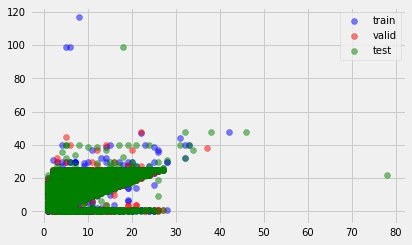

In [476]:
plt.scatter(train['floor'], train['housefloor'], c='b', alpha=0.5, label='train')
plt.scatter(valid['floor'], valid['housefloor'], c='r', alpha=0.5, label='valid')
plt.scatter(test['floor'], test['housefloor'], c='g', alpha=0.5, label='test')


plt.legend()

In [477]:
train.loc[train['housefloor'] > 60, 'housefloor'] = train['housefloor'].median()

In [478]:
test.loc[test['housefloor'] > 60, 'housefloor'] = test['housefloor'].median()
test.loc[test['floor'] > 70, 'floor'] = 7

#### houseyear

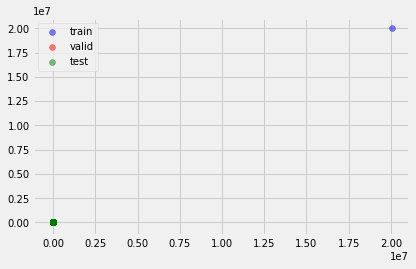

In [479]:
plt.scatter(train['houseyear'], train['houseyear'], c='b', alpha=0.5, label='train')
plt.scatter(valid['houseyear'], valid['houseyear'], c='r', alpha=0.5, label='valid')
plt.scatter(test['houseyear'], test['houseyear'], c='g', alpha=0.5, label='test')


plt.legend()

In [480]:
train.loc[train['houseyear'] > 2020]

,id,districtid,rooms,square,lifesquare,kitchensquare,floor,housefloor,houseyear,ecology_1,ecology_2,ecology_3,social_1,social_2,social_3,healthcare_1,helthcare_2,shops_1,shops_2,price
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396


In [481]:
train.loc[train['id'] == 11607, 'houseyear'] = 1968
train.loc[train['id'] == 10814, 'houseyear'] = 2011

### Функции правки некорректных данных и заполнения пропущенных значений.

In [482]:
def fill_room(train, df):
    
    med = train['rooms'].median()
    
    df.loc[df['rooms'] > 6, 'rooms'] = med
    df.loc[df['rooms'] < 1, 'rooms'] = med
    
    return df

In [483]:
def fill_square(train, df):
    
    med = train['square'].median()
    
    df.loc[df['square'] > 250, 'square'] = med
    df.loc[df['square'] < 15, 'square'] = med
    
    return df

In [484]:
def norm_year(df):
    
    df.loc[df['houseyear'] > 2020] = 2020
    
    return df

In [485]:
def norm_floor(train, df):
    
    df.loc[df['floor'] == 0, 'floor'] = 1
    df.loc[df['housefloor'] == 0, 'housefloor'] = train['housefloor'].median()
    df.loc[df['housefloor'] > 40, 'housefloor'] = 40
    df.loc[df['floor'] > 40, 'floor'] = df['housefloor']
    df.loc[df['housefloor'] < df['floor'], 'housefloor'] = df['floor']
    
    return df

In [486]:
def fill_kitchen(train, df):
    
    med = train['kitchensquare'].median()
    
    df.loc[df['kitchensquare'] < 5, 'kitchensquare'] = med
    
    return df

In [487]:
def fill_healthcare(train, df):

    med = train['healthcare_1'].median()
    
    df['healthcare_1'] = df['healthcare_1'].fillna(med)
    
    return df

In [488]:
def fill_lifesquare(train, df):
    
    med = train.groupby('rooms')['lifesquare'].median().to_dict()   
    
    for key, val in med.items():
        
        df.loc[(df['lifesquare'].isnull() == True) & (df['rooms'] == key), 'lifesquare'] = val
        
    df['lifesquare'] = df['lifesquare'].fillna(0)
        
    return df

In [489]:
# t_cor = train.corr()

# t_cor['price'].sort_values(ascending=False)

### Замена категориальных признаков на числовые

In [490]:
def get_cat(df):

    df['ecology_2'] = (df['ecology_2'] == 'B').astype(int)
    df['ecology_3'] = (df['ecology_3'] == 'B').astype(int)
    df['shops_2'] = (df['shops_2'] == 'B').astype(int)

    return df

###  Добавление новых признаков

In [491]:
def med_room_price(train, df):
    
    med = train.groupby('districtid').apply(lambda x: x['price'].mean() / x['rooms'].mean()).to_dict()
    
    for key, val in med.items():
        
        df.loc[df['districtid'] == key, 'med_room_price'] = val
        
    df['med_room_price'] = df['med_room_price'].fillna(med)
    
    return df

In [492]:
def med_m2_price(train, df):
    
    med = train.groupby('districtid').apply(lambda x: x['price'].median() / x['square'].median()).to_dict()   
    
    for key, val in med.items():
        
        df.loc[df['districtid'] == key, 'med_m2_price'] = val
        
    df['med_m2_price'] = df['med_m2_price'].fillna(med)
    
    return df

In [493]:
def distr_dens(train, df):
    
    dens = train['districtid'].value_counts().to_dict()
    
    for key, val in dens.items():
        
        df.loc[df['districtid'] == key, 'distr_dens'] = val
        
    df['distr_dens'] = df['distr_dens'].fillna(0)
    
    return df

#### Общие функции подготовки данных

In [494]:
def norm_feats(train, df):

    df = norm_year(df)
    df = norm_floor(train, df)
    
    return df

In [495]:
def fill_data(train, df):
    
    df = fill_room(train, df)
    df = fill_square(train, df)
    df = fill_kitchen(train, df)
    df = fill_healthcare(train, df)
    df = fill_lifesquare(train, df)
    
    return df

In [496]:
def add_feats(train, df):
    
    
    df = med_room_price(train, df)
    df = med_m2_price(train, df)
    df = distr_dens(train, df)
    
    return df

### Применение функций корректировки данных

#### для train

In [497]:
train = get_cat(train)

In [498]:
train = norm_feats(train, train)

In [499]:
train = fill_data(train, train)

In [500]:
train = add_feats(train, train)

In [501]:
train = train.fillna(0)

#### для valid

In [502]:
valid = get_cat(valid)

In [503]:
valid = norm_feats(train, valid)

In [504]:
valid = fill_data(train, valid)

In [505]:
valid = add_feats(train, valid)

In [506]:
valid = valid.fillna(0)

#### для test

In [507]:
test = get_cat(test)

In [508]:
test = norm_feats(train, test)

In [509]:
test = fill_data(train, test)

In [510]:
test = add_feats(train, test)

In [511]:
test = test.fillna(0)

### Построение модели

In [512]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score as r2

In [513]:
model = RFR(n_estimators=1000, max_depth=14, random_state=42, max_features=6)

In [514]:
feats = ['id', 'districtid', 'rooms', 'square', 'lifesquare', 'kitchensquare',
       'floor', 'housefloor', 'houseyear', 'ecology_1', 'social_1', 'social_2', 'social_3', 'healthcare_1',
       'helthcare_2', 'shops_1','med_m2_price', 'distr_dens']

####  Gridsearch

In [515]:
# params = [{'n_estimators':[200, 250, 300], 
#           'max_features': [3, 4, 5, 6],
#           'max_depth':[10, 14, 16, 20]}]

In [516]:
# grid = GridSearchCV(estimator=RFR(random_state=42),
#                    param_grid=params,
#                    scoring='r2',
#                    cv=5)

In [517]:
# grid.fit(train.loc[:, feats], train['price'])

In [518]:
# grid.best_params_

In [519]:
# grid.best_score_

#### forest

In [520]:
model.fit(train.loc[:, feats], train['price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=42, verbose=0, warm_start=False)

In [521]:
train_pred = model.predict(train.loc[:, feats])

In [522]:
r2(train['price'], train_pred)

0.9437072257925827

In [523]:
valid_pred = model.predict(valid.loc[:, feats])

In [524]:
r2(valid['price'], valid_pred)

0.7308907234955979

In [525]:
test['price'] = model.predict(test.loc[:, feats])

####  Переименование price и id 

In [526]:
test = upperrcase_cols(test)

#### Сохранение целевой переменной

In [529]:
 test.loc[:, ['Id', 'Price']].to_csv('AEvdokimov_predictions.csv', index=None)